#Final Project

#Hotel Sentiment Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Project-Hotel Sentiment Analysis/Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Data Preprocessing

In [59]:
# Removing 'No Negative' & 'No Positive' values

# Convert the column to string type before applying replace
df.loc[:, 'Positive_Review'] = df.Positive_Review.astype(str).apply(lambda x: x.replace('No Positive', ''))

df.loc[:, 'Negative_Review'] = df.Negative_Review.astype(str).apply(lambda x: x.replace('No Negative', ''))

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,Negative
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,Positive
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,Positive
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,Negative
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,Negative


In [10]:
# Merging  Postive & Negative to get full reviews

df["Review"] = df.Negative_Review + df.Positive_Review

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...


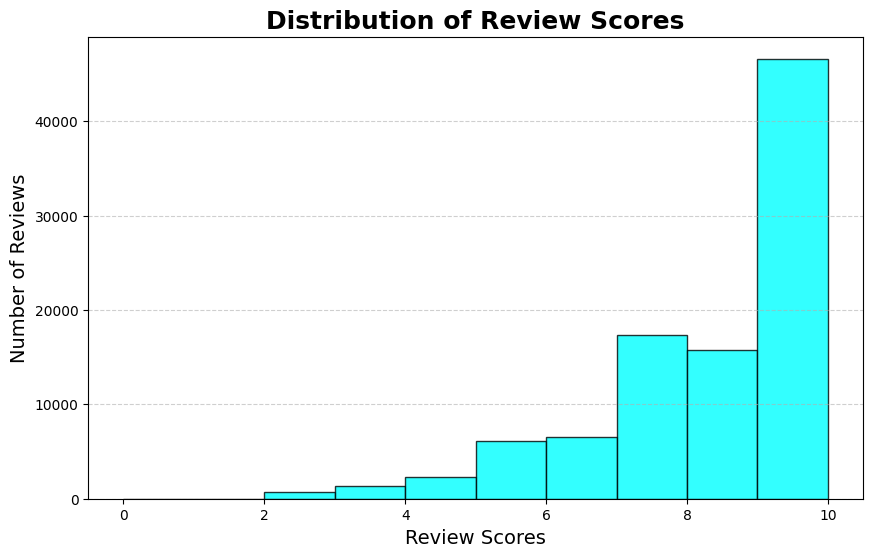

In [11]:
# Creating plots to visualize the Reviews

plt.figure(figsize= (10,6))

plt.hist(df['Reviewer_Score'], bins=[0,1,2,3,4,5,6,7,8,9,10], color= 'aqua', edgecolor = 'black', alpha=0.8 )

plt.grid(axis='y', linestyle= '--', alpha=0.6)

plt.xlabel('Review Scores', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

plt.title('Distribution of Review Scores', fontsize=18, fontweight="bold")

plt.show()

In [12]:
# Majority are good reviews. Taking threshold as 7. Assigning sentiment based on review score.

df["Sentiment"] = df["Reviewer_Score"].apply(lambda x: "Negative" if x < 7 else "Positive")

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,Negative
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,Positive
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,Positive
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,Negative
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,Negative


In [13]:
# creating dataset

data_df = df[["Review", "Sentiment"]]

data_df.head()

,Review,Sentiment
0,I am so angry that i made this post available...,Negative
1,No Negative No real complaints the hotel was g...,Positive
2,Rooms are nice but for elderly a bit difficul...,Positive
3,My room was dirty and I was afraid to walk ba...,Negative
4,You When I booked with your company on line y...,Negative


In [14]:
# Function to visualize distribution of "Positive" and "Negative" reviews

def plot_label_counts(data_df, dist=1000):
    label_counts = data_df['Sentiment'].value_counts()

    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color=['skyblue', 'red'], alpha=0.7, edgecolor='black')

    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Comparison of Positive and Negative Labels', fontsize=16)

    for index, value in enumerate(label_counts):
        plt.text(index, value + dist, str(value), ha='center', fontsize=12)

    plt.show()

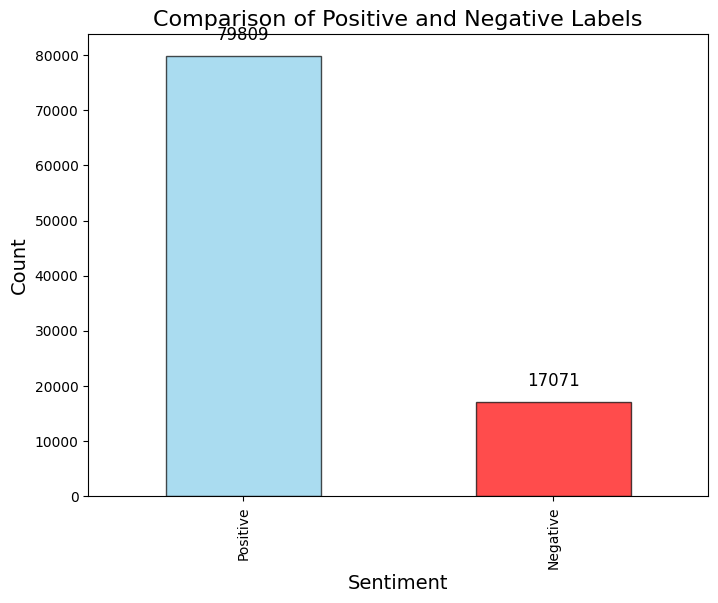

In [15]:
# Visualize distribution

plot_label_counts(data_df, 3000)

In [16]:
# Undersampling data to balance the dataset

df_positive = data_df[data_df['Sentiment'] == 'Positive']
df_negative = data_df[data_df['Sentiment'] == 'Negative']

df_positive_downsampled = resample(df_positive, replace=False,n_samples=len(df_negative),random_state=42)

# Combine minority class with downsampled majority class

data_df = pd.concat([df_positive_downsampled, df_negative])
len(data_df)

34142

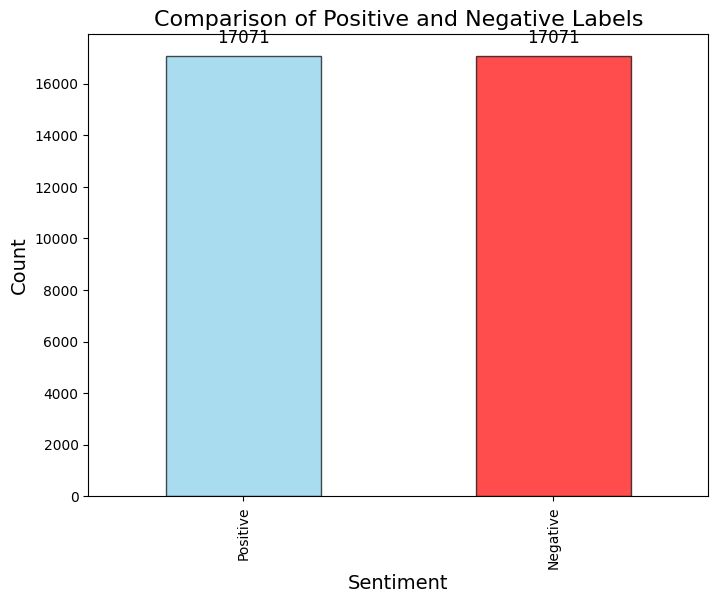

In [17]:
# visualize after undersampling

plot_label_counts(data_df, 500)

In [19]:
# Check dataframe before data preparation

data_df.head()

,Review,Sentiment
60379,Bars shut at 11pm Clean and friendly would de...,Positive
26326,Nothing Great service Great room,Positive
88152,money value compared to its location customer...,Positive
91361,to pay for WIFINo Positive,Positive
54297,Room slightly worn curtain lining and arms of...,Positive


### Data Preparation

In [20]:
# Enccoding labels

label_enc = LabelEncoder()
y = label_enc.fit_transform(data_df.Sentiment.values)

y

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(data_df.Review, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27313,), (6829,), (27313,), (6829,))

In [22]:
# Creating feature vector

tfv = TfidfVectorizer(min_df=3, strip_accents='unicode', token_pattern=r'\w{1,}', ngram_range=(1, 3), sublinear_tf=True, stop_words = 'english')

In [23]:
# Fit the TFIDF vectorizer on the training data

tfv.fit(X_train)

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [24]:
# Transform the training and test data

X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

# Models

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# Fit the Logistic Regression model

model1 = LogisticRegression()

model1.fit(X_train_tfv, y_train)

LogisticRegression()

In [27]:
# Predict on the test set

y_pred = model1.predict(X_test_tfv)

In [28]:
# Save the model

joblib.dump(model1, 'Logistic_Regression_Model.pkl')

['Logistic_Regression_Model.pkl']

In [29]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

In [30]:
# Result Output

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8208

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      3396
           1       0.84      0.79      0.82      3433

    accuracy                           0.82      6829
   macro avg       0.82      0.82      0.82      6829
weighted avg       0.82      0.82      0.82      6829



**Logistic Regression** gives **82.08%** accuracy.

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Fit the Random Forest model

model2 = RandomForestClassifier(random_state=42)

model2.fit(X_train_tfv, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predict on the test set

y_pred = model2.predict(X_test_tfv)

In [34]:
# Save the model

joblib.dump(model2, 'Random_Forest_Model.pkl')

['Random_Forest_Model.pkl']

In [35]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [36]:
# Result Output

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7935

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      3396
           1       0.81      0.76      0.79      3433

    accuracy                           0.79      6829
   macro avg       0.79      0.79      0.79      6829
weighted avg       0.79      0.79      0.79      6829



**Random Forest** gives **79.35%** accuray.

### Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
# Fit the Naive Bayes model

model3 = MultinomialNB()
model3.fit(X_train_tfv, y_train)

MultinomialNB()

In [39]:
# Predict on the test set

y_pred = model3.predict(X_test_tfv)

In [40]:
# Save the model

joblib.dump(model3, 'Naive_Bayes_Model.pkl')

['Naive_Bayes_Model.pkl']

In [41]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [42]:
# Result Output

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8186

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      3396
           1       0.85      0.78      0.81      3433

    accuracy                           0.82      6829
   macro avg       0.82      0.82      0.82      6829
weighted avg       0.82      0.82      0.82      6829



**Naive Bayes** gives **81.86%** accuracy.

### XGBoost

In [43]:
import xgboost as xgb

In [44]:
# Fit the XGBoost model

model4 = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model4.fit(X_train_tfv, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
# Predict on the test set

y_pred = model4.predict(X_test_tfv)

In [46]:
# Save the model

joblib.dump(model4, 'XGBoost_Model.pkl')

['XGBoost_Model.pkl']

In [47]:
# Result Output

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8186

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      3396
           1       0.85      0.78      0.81      3433

    accuracy                           0.82      6829
   macro avg       0.82      0.82      0.82      6829
weighted avg       0.82      0.82      0.82      6829



**XGBoost** gives **81.86%** accuracy.

### LightGBM

In [48]:
import lightgbm as lgb

In [49]:
# Fit the LightGBM model

model5 = lgb.LGBMClassifier()
model5.fit(X_train_tfv, y_train)

[LightGBM] [Info] Number of positive: 13638, number of negative: 13675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.809313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155766
[LightGBM] [Info] Number of data points in the train set: 27313, number of used features: 4789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499323 -> initscore=-0.002709
[LightGBM] [Info] Start training from score -0.002709


LGBMClassifier()

In [50]:
# Predict on the test set

y_pred = model5.predict(X_test_tfv)

In [51]:
# Save the model

joblib.dump(model5, 'LightGBM_Model.pkl')

['LightGBM_Model.pkl']

In [52]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [53]:
# Result Output

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8030

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3396
           1       0.81      0.79      0.80      3433

    accuracy                           0.80      6829
   macro avg       0.80      0.80      0.80      6829
weighted avg       0.80      0.80      0.80      6829



**XGBoost** gives **80.30%** accuracy.

## Model Evaluation

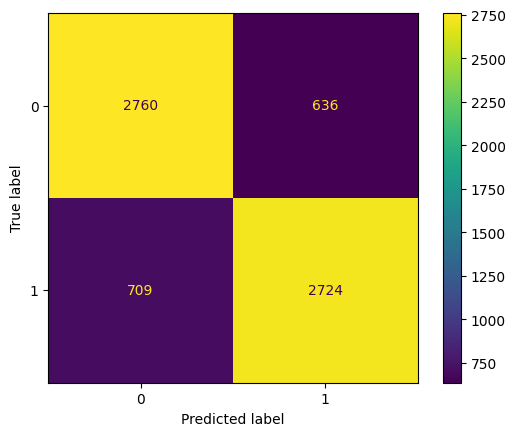

In [54]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)

plt.show()

In [55]:
# Probabilities

y_prob = model1.predict_proba(X_test_tfv)[:, 1]

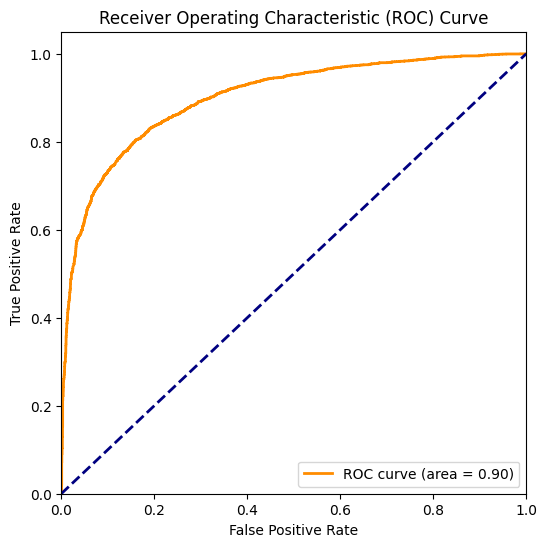

In [56]:
# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')
plt.show()


## Sample Predictions

In [57]:
# Sample predictions from the dataset

sample_indices = range(10)

# Get sample data

X_sample = X_test.iloc[sample_indices]
y_sample_true = y_test[sample_indices]
y_sample_pred = y_pred[sample_indices]

# Create a DataFrame to display results

sample_df = pd.DataFrame({
    'Review': X_sample,
    'True Label': label_enc.inverse_transform(y_sample_true),
    'Predicted Label': label_enc.inverse_transform(y_sample_pred)})

print("Sample Predictions:")
print(sample_df)

Sample Predictions:
                                                  Review True Label  \
40581              Too much noisy Location room bathroom   Negative   
2398    The staff in room service over the phone were...   Negative   
47383   Food needs to be replenished quicker at break...   Positive   
80802   The rooms aren t like the ones in the picture...   Negative   
94563   Room size for deluxe king size double very cr...   Negative   
88599   Small rooms Nothing special Parking fee s  Th...   Negative   
60728         No fridge in the room The room size shower   Positive   
18052          No Negative Everything specially location   Positive   
66142  No Negative Excellent location and good for th...   Positive   
89356   as mentioned above the room is too small and ...   Negative   

      Predicted Label  
40581        Negative  
2398         Negative  
47383        Positive  
80802        Negative  
94563        Negative  
88599        Negative  
60728        Negative  
18052 

## Conclusion

### Logistic Regression gives 82.08% best accuracy.

# Thank You👍